In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df = pd.read_csv('ozone.csv')
df.head()

,"Month,""Day_of_month"",""Day_of_week"",""ozone_reading"",""pressure_height"",""Wind_speed"",""Humidity"",""Temperature_Sandburg"",""Temperature_ElMonte"",""Inversion_base_height"",""Pressure_gradient"",""Inversion_temperature"",""Visibility""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120


Los nombres de las variables están mal posicionados en el .csv y así es imposible comenzar a trabajar con él, por lo que se cambiarán los nombres de las columnas y crearemos una nueva variable (new_df) que contenga la base de datos modificada.

In [125]:
variables = df.columns
new_df = df.rename(columns = {variables[0]:'month',variables[1]:'day_of_month',variables[2]:'day_of_week',variables[3]:'ozone_reading',variables[4]:'pressure_height',
                   variables[5]:'wind_speed',variables[6]:'humidity',variables[7]:'temperature_sandburg',variables[8]:'temperature_elmonte',variables[9]:'inversion_base_height',
                              variables[10]:'pressure_gradient',variables[11]:'inversion_temperature',variables[12]:'visibility'})
new_variables = new_df.columns
new_df

,month,day_of_month,day_of_week,ozone_reading,pressure_height,wind_speed,humidity,temperature_sandburg,temperature_elmonte,inversion_base_height,pressure_gradient,inversion_temperature,visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,12,23,4,3.21,5680,4,57,47,45.32,508,-10,58.64,100
199,12,27,1,1.74,5730,3,53,51,49.28,111,-14,72.50,200
200,12,28,2,2.69,5690,3,23,51,49.28,5000,-36,51.26,70
201,12,29,3,5.05,5650,3,61,50,46.58,3704,18,46.94,40


In [126]:
new_df.describe()

,month,day_of_month,day_of_week,ozone_reading,pressure_height,wind_speed,humidity,temperature_sandburg,temperature_elmonte,inversion_base_height,pressure_gradient,inversion_temperature,visibility
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,6.522167,15.704433,3.004926,11.373990,5746.157635,4.866995,57.610837,61.113300,56.542956,2601.748768,14.428571,60.692709,122.197044
std,3.594998,8.569537,1.401899,8.192652,113.027705,2.105402,20.847662,14.206468,11.742668,1859.889449,36.317202,14.124734,81.171317
min,1.000000,1.000000,1.000000,0.720000,5320.000000,0.000000,19.000000,25.000000,27.680000,111.000000,-69.000000,27.500000,0.000000
25%,3.000000,9.000000,2.000000,4.770000,5690.000000,3.000000,46.000000,51.500000,49.640000,869.000000,-14.000000,51.260000,60.000000
50%,6.000000,15.000000,3.000000,8.900000,5760.000000,5.000000,64.000000,61.000000,56.480000,2083.000000,18.000000,60.980000,100.000000
75%,10.000000,23.000000,4.000000,16.075000,5830.000000,6.000000,73.000000,71.000000,66.200000,5000.000000,43.000000,70.880000,150.000000
max,12.000000,31.000000,5.000000,37.980000,5950.000000,11.000000,93.000000,93.000000,82.580000,5000.000000,107.000000,90.680000,350.000000


##1.- (0,75 puntos) Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,
Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos
obtenidos en cada caso.


Primero se va a verificar la existencia o no de valores 'NaN' dentro de las variables que a continuación se analizarán.  

In [127]:
val_null = new_df.isna().any().any()

if val_null:
    print("Hay valores NaN en el DataFrame")
else:
    print("No hay valores NaN en el DataFrame")

No hay valores NaN en el DataFrame


No hay valores NaN en toda la base de datos, por lo tanto tampoco en las tres variables que se pide analizar.

**ANÁLISIS DE OUTLIERS**

Para poder hacer un análisis de los outliers, es importante conocer el rango que pueden tomar nuestras variables.

**wind_speed** : indica la velocidad del viento en km/h.  La velocidad del viento puede ir desde 0 km/h hasta más de 117 km/h en caso de huracanes, pero el rango para un viento suave o moderado sería de 0 km/h a 39 km/h, aproximadamente.  Como los datos son de Pozuelo de Alarcón, podemos afirmar que el viento es normalmente suave o moderado, así que se moverá en un rango [0, 17] km/h según datos históricos, aunque lo más común es que esté entre [0, 10] km/h.

datos historicos:
https://www.meteoblue.com/es/tiempo/historyclimate/climatemodelled/pozuelo-de-alarc%C3%B3n_espa%C3%B1a_3112989

https://es.windfinder.com/forecast/pozuelo_de_alarcon_madrid_spain

info wind speed:
https://www.pce-iberica.es/medidor-detalles-tecnicos/tablas-de-velocidades-del-viento.htm


**ozone_reading**: contiene datos sobre la cantidad de Ozono (O3) en el aire. Se mide en µg/m3 ...

**visibility**: mide, en km, la distancia máxima a la cual es posible ver claramente.  Se mide horizontalmente.


In [128]:
new_df[['wind_speed','ozone_reading','visibility']].describe()

,wind_speed,ozone_reading,visibility
count,203.000000,203.000000,203.000000
mean,4.866995,11.373990,122.197044
std,2.105402,8.192652,81.171317
min,0.000000,0.720000,0.000000
25%,3.000000,4.770000,60.000000
50%,5.000000,8.900000,100.000000
75%,6.000000,16.075000,150.000000
max,11.000000,37.980000,350.000000


En cuando a wind_speed, no parece haber ningún dato fuera de lo normal.

analizamos los outliers

In [129]:
media = new_df['wind_speed'].mean()
dt = new_df['wind_speed'].std()

umbral = 3
outliers = new_df[(new_df['wind_speed']>media + umbral * dt)|(new_df['wind_speed']<media-umbral*dt)]


Uno de los mejores gráficos para observar la distribución de los datos y datos fuera de lo normal es el boxplot.  

<Axes: xlabel='wind_speed'>

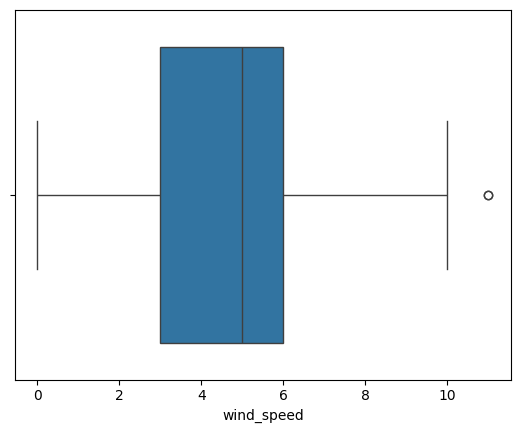

In [130]:
import seaborn as sns

sns.boxplot(x=new_df['wind_speed'])


Todos los datos de wind_speed, excepto uno, se encuentran en el rango [0, 10]. Hay un valor atípico en el punto 11, pero no se desvía demasiado de los demás y no es un valor considerablemente raro, por lo que no se le debe tratar de ninguna forma especial.

<Axes: xlabel='ozone_reading'>

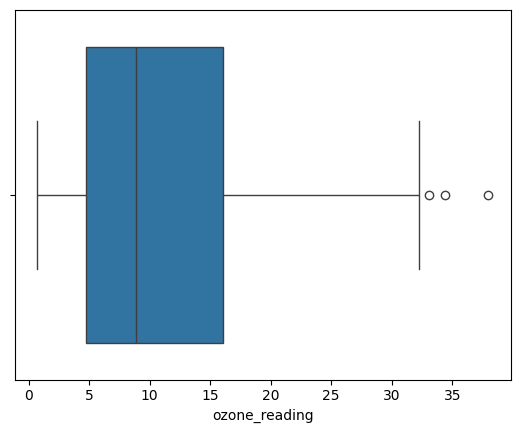

In [131]:
sns.boxplot(x=new_df['ozone_reading'])


Los valores de ozono están mayoritariamente concentrados en un rango [0, 32].  Hay tan solo tres valores atípicos en los puntos 33, 34 y 38 aproximadamente.

<Axes: xlabel='visibility'>

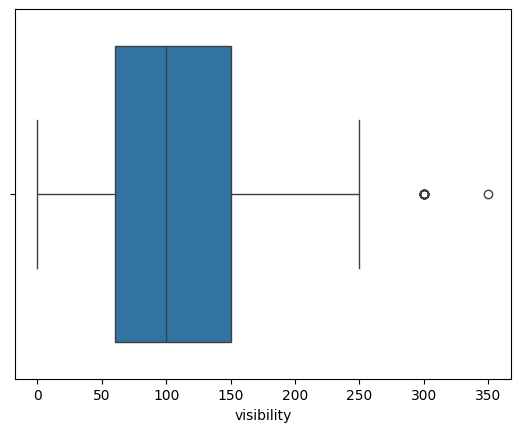

In [132]:
sns.boxplot(x=new_df['visibility'])

Los valores de la variable 'visibility' se concentran sobre todo en el rango [0, 250] y hay valores atípicos en los puntos 300 y 350.


## 2.- (0,75 puntos) Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y “Visibility”.



## 3.- (1 punto) Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan relacionar diferentes variables ¿Qué nos dicen los datos?



Resulta interesante comparar la concentración de ozono con la velocidad del viento para examinar la dispersión de contaminantes por el aire, pues influye en la calidad del aire y en consecuencia en la salud pública.

Otra posible relación de variables podría ser la de la temperatura y presión atmosférica, pues se pueden detectar cambios en el clima, por ejemplo: una disminución en la presión atmosférica podría indicar la llegada de una tormenta o de frío.

La última relación que se realizará es una de las más importantes ya que está relacionada con la contaminación: la relación entre la temperatura de inversión y la concentración de ozono, pues se sabe que a más contaminación, más calor hace en el planeta.

**CATEGORIZACIÓN DE VARIABLES**

Se emplearán cuatro variables en este apartado y dos de ellas serán las que se categorizarán.

**wind_speed** : se dividirán los valores en 'Tranquilo' y 'Suave'.

In [133]:
lim = [0, 3, float('inf')]
etiqueta= ['Viento suave', 'Viento tranquilo']
new_df['wind_category'] = pd.cut(new_df['wind_speed'], bins=lim, labels=etiqueta, right=False)


**temperature_elmonte** : se dividirán los datos en 'Mucho frío', de 0 a 7 grados, 'Frío', de 8 a 17 grados, 'Fresco', de 18 a 26 grados, y 'Caluroso', de 26 grados en adelante.  Como los valores aparecen, aparentemente, en grados Farenheit, se pondrá en el código lo equivalente al grado Celsius en Farenheit.

In [134]:
lim = [26,47,65 ,78.8, float('inf')]
etiqueta = ['Mucho frío','Frío','Fresco','Caluroso']
new_df['tempelmonte_category'] = pd.cut(new_df['temperature_elmonte'], bins=lim, labels=etiqueta, right=False)

**inversion_temperature** : se van a distribuir los datos igual que en la anterior variable.

In [135]:
lim = [26,47,65,78.8, float('inf')]
etiqueta = ['Mucho frío','Frío','Fresco','Caluroso']
new_df['tempinversion_category'] = pd.cut(new_df['inversion_temperature'], bins=lim, labels=etiqueta, right=False)

**RELACIÓN OZONE_READING Y WIND_SPEED**

Para estudiar esta relación se empleará un gráfico de dispersión y el coeficiente de correlación.

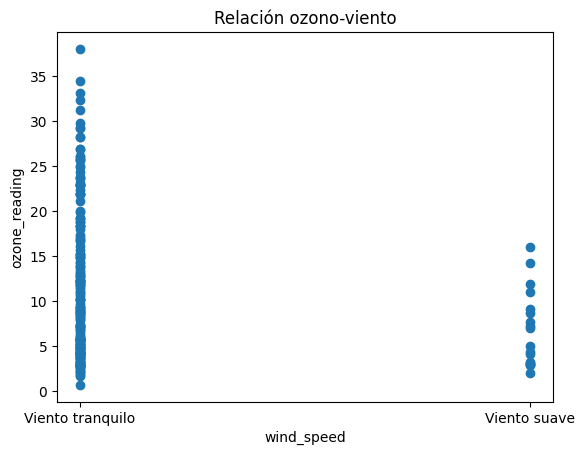

Coeficiente de correlación: 0.08179857982380294


In [136]:
import matplotlib.pyplot as plt

plt.scatter(new_df['wind_category'], new_df['ozone_reading'])
plt.xlabel('wind_speed')
plt.ylabel('ozone_reading')
plt.title('Relación ozono-viento')
plt.show()

#COEFICIENTE DE CORRELACIÓN
correlation = new_df['wind_speed'].corr(new_df['ozone_reading'])
print("Coeficiente de correlación:", correlation)

Se ha demostrado que las variables ozono y velocidad del tiempo tienen una débil relación lineal.  Tal y como se observa en el gráfico, con tiempo suave hay tanto contaminación alta como baja, y con viento ínfimamente más fuerte solo hay contaminación muy baja, pero esto no aporta ningún tipo de información.

Con respecto al coeficiente de relación, se ve que la relación es directamente proporcional al ser el coeficiente de correlación positivo (a más viento más contaminación en el aire), pero es una relación demasiado débil porque el valor es muy cercano al 0.

En definitiva, no hay suficiente evidencia para afirmar que la contaminación de ozono aumenta cuando más viento hay; por lo tanto, no sirve dicha relación para estudiar la contaminación en el aire.

**RELACIÓN PRESSURE_HEIGHT Y TEMPERATURE_ELMONTE**

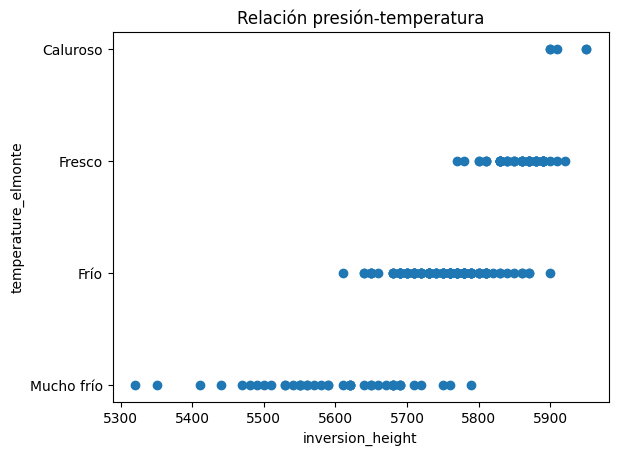

Coeficiente de correlación: 0.8968938521079255


In [142]:
plt.scatter(new_df['pressure_height'], new_df['tempelmonte_category'])
plt.xlabel('inversion_height')
plt.ylabel('temperature_elmonte')
plt.title('Relación presión-temperatura')
plt.show()

correlation = new_df['temperature_elmonte'].corr(new_df['pressure_height'])
print("Coeficiente de correlación:", correlation)

En el gráfico se ve que tiende a la derecha y a arriba.  Esto significa que hay correlación entre la presión atmosférica y la temperatura, pues para mismas temperaturas, mismas presiones.  Además, el coeficiente de correlación es positivo y muy cercano a 1 (casi 0.9), por lo que hay evidencia suficiente para afirmar que a más presión, más calor.

**RELACIÓN INVERSION_TEMPERATURE Y OZONE_READING**



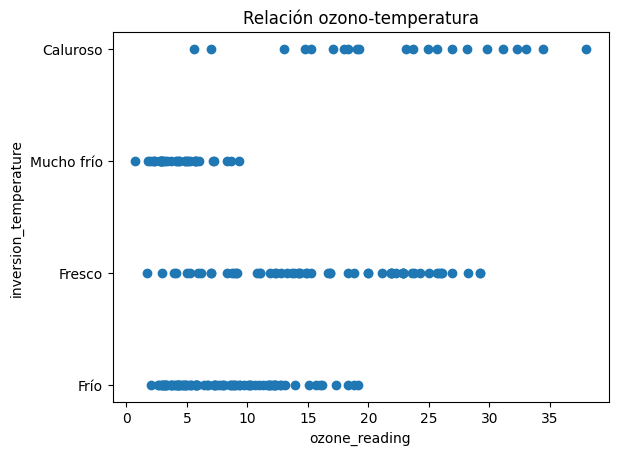

Coeficiente de correlación: 0.7175618600763667


In [141]:
plt.scatter(new_df['ozone_reading'], new_df['tempinversion_category'])
plt.xlabel('ozone_reading')
plt.ylabel('inversion_temperature')
plt.title('Relación ozono-temperatura')
plt.show()

#COEFICIENTE DE CORRELACIÓN
correlation = new_df['inversion_temperature'].corr(new_df['ozone_reading'])
print("Coeficiente de correlación:", correlation)

En el gráfico se observa una evidente relación: al aumentar la concentración de ozono, aumenta la temperatura.  El coeficiente de correlación también sostiene esta afirmación.

##4.- (1 punto) Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.

Las variables principales son: ozone_reading e inversion_temperature, pues parecen las más relacionadas con la contaminación.

<Axes: >

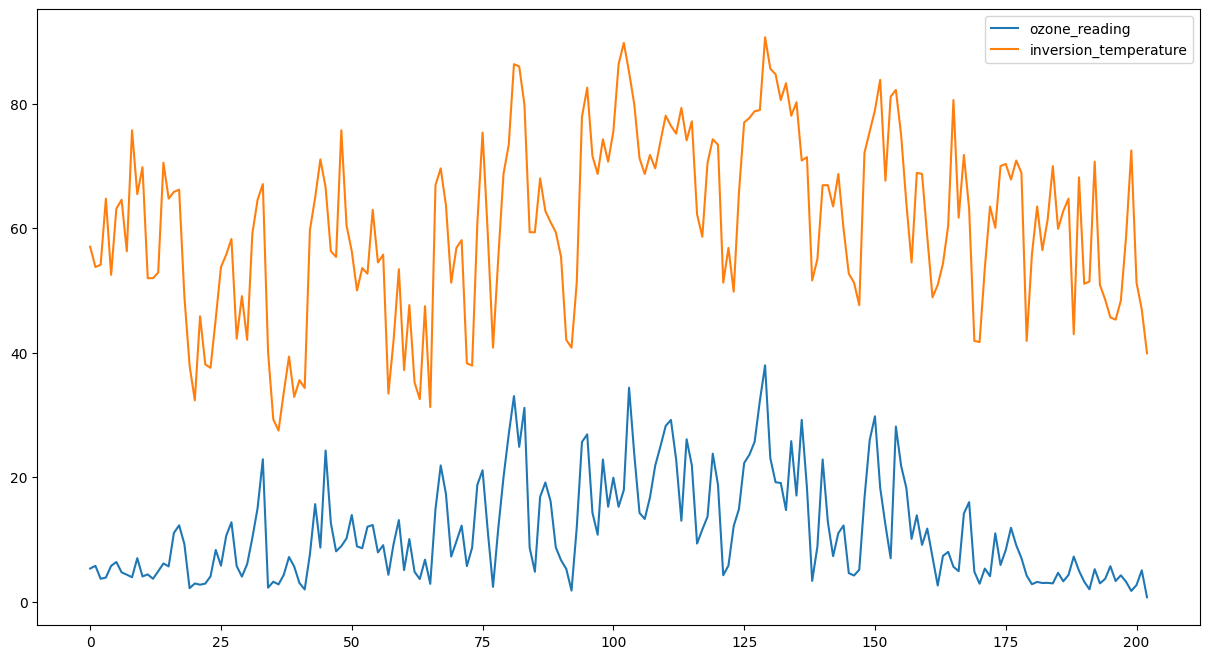

In [139]:
new_df[['ozone_reading','inversion_temperature']].plot(figsize = (15,8))